## Neural Network from scratch

In [202]:
import numpy as np
np.random.seed(1)

In this notebook we are going to build a feed forward neural network (NN) from scratch, i.e., using numpy. This will allow us to understand the basic principles of NN, some of its problems and solutions to them.

We are going to do that à la Keras, this is, using classes for each type of layer. You can think this is overkilling, but the structure of Object Orienting Programming (OOP) really fits our requirements for our task: to have objects (layers) with parameters in memory (weights), and we want to apply functions with these parameters (forward pass and predict) and also to update them (backward pass / train).

A simple guide to OOP in Python 3 can be found [here](https://realpython.com/python3-object-oriented-programming/).

## Class example

A simple example of a class, which is a circle, is the following

In [2]:
# In Python 3 both ways of defyning a class are equivalent
# class Circle(object): 
class Circle():
    # __init__ is only applied when defining an object of the class
    def __init__(self, radius):
        self.radius = radius
        self.perimeter = 2* np.pi * self.radius
    def set_radius(self, radius):
        self.radius = radius
        # NOTE THAT WE ARE NOT UPDATING PERIMETER
    def area(self):
        return np.pi*self.radius**2
    def print_perimeter(self):
        print('The perimeter is',self.perimeter)
        return None

In [3]:
# We create an object of the class Circle
circle_obj = Circle(3)
# Let's check what circle_obj is
print('Check circle_obj and its type')
print(circle_obj)
print(type(circle_obj))

# We can use its methods
print('\nWe use its methods, like area() and print_perimeter()')
print(circle_obj.area())
circle_obj.print_perimeter()

# We can access to its object variables
print('\nWe directly access to its variables, like perimeter')
print(circle_obj.perimeter)

# We can change its variables though methods. Remember that this changes the radius, but not the perimeter
print('\nNow we set the object variable radius to one')
circle_obj.set_radius(1)
print(circle_obj.radius)
print('But the variable perimeter has not change')
circle_obj.print_perimeter()

# Area only uses the variable radius, which has been updated
print('\nWe can use the method area() to print the area')
print(circle_obj.area())

# But we can direcly change the value of perimeter without changing radius
print('\nNow we set the value of the perimeter to -1')
circle_obj.perimeter = -1.
circle_obj.print_perimeter()
print('\nIT IS CLEAR THAT THIS IS NOT A CONSISTENT WAY FOR DEFYNING THIS CLASS')

Check circle_obj and its type
<class '__main__.Circle'>

We use its methods, like area() and print_perimeter()
28.274333882308138
The perimeter is 18.84955592153876

We directly access to its variables, like perimeter
18.84955592153876

Now we set the object variable radius to one
1
But the variable perimeter has not change
The perimeter is 18.84955592153876

We can use the method area() to print the area
3.141592653589793

Now we set the value of the perimeter to -1
The perimeter is -1.0

IT IS CLEAR THAT THIS IS NOT A CONSISTENT WAY FOR DEFYNING THIS CLASS


## Backpropagation algorithm (theory)

Let us start defying the shapes of our data structures. For example, the features and targets of out dataset:
$$ X = (M, n_0)\;\;\textrm{and} \;\; Y = (M, n_C) \;,$$
where $M$ is the number of items (it does not have no coincide with the length of the dataset if we are working with batches), $n_0$ is the number of features of our inputs and $n_C$ the number of classes, since we are going to use one-hot encoding.

The dense layer has a matrix of weights $W$ and the vector of biases $b$, if it has $n_0$ input features and $n_1$ output features, the shape of them is
$$W = (n_0,n_1)\;\;\textrm{and} \;\; b = (n_1).$$



### Warm up: Linear regression



#### Forward

The operation of a dense layer, applied to one item $X_{(a)}\in X$ is
$$Z_{(a)}^j= X_{(a)}^i\cdot W^{ij} + b^j$$
$$(n_1) = (n_0) \cdot  (n_0,n_1)+ (n_1)\;,$$
and this can be directly apply to the whole batch (remember numpy's broadcasting)
$$Z = X \cdot W + b$$
$$(M,n_1) = (M,n_0) \cdot  (n_0,n_1)+ (n_1) \;.$$


#### Backward (warm up)
First of all, let us assume that we have a loss function which is local in the inputs, this is
$$\mathcal{L}(X,Y,\theta) = \frac{1}{M}\sum_{a=1}^M \mathcal{L}(X_{(a)},Y_{(a)},\theta)\;,$$
where we are denoting all the training parameters as $\theta$.

For example, for a linear regression we have
$\mathcal{L}(X_{(a)},Y_{(a)},\theta) = \frac{1}{2}(Z_{(a)}- Y_{(a)})^2$, with $Z_{(a)}= X_a\cdot W + b$,
and the gradients of the loss function w.r.t. the parameters are easily computed as:
$$\frac{\partial \mathcal{L}_{(a)}}{\partial b^{j}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}} \frac{\partial Z_{(b)}^{k}}{\partial b^{j}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}}\delta_{(ab)} \delta^{kj} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}^{j}}
\rightarrow 
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M}\sum_a  \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}}
\;, $$

$$\frac{\partial \mathcal{L}_{(a)}}{\partial W^{ij}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}} \frac{\partial Z_{(b)}^{k}}{\partial W^{ij}} =
\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(b)}^{k}} \delta_{(ab)}  X_{(b)}^l  \delta^{li} \delta^{kj} 
=
X_{(a)}^i \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}^{j}} 
\rightarrow 
\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{M}\sum_a  X_{(a)} \cdot \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}}   
\;, $$

Now, if we add an activation function (element-wise) the expressions only change slightly
$$\tilde{Z}_{(a)}^{j} =  g\left( Z_{(a)}^{j} \right)= g\left( X_{(a)}^{i}\cdot W^{ij} + b^{j} \right)\;.$$

All we have to do is to apply the chain rule one step further:
$$\frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}^{k}} \rightarrow
\frac{\partial \mathcal{L}_{(a)}}{\partial \tilde{Z}_{(a)}^{k}} \frac{\partial \tilde{Z}_{(a)}^{k} }{\partial Z_{(a)}^{k}} = 
\frac{\partial \mathcal{L}_{(a)}}{\partial \tilde{Z}_{(a)}^{k}}g'(Z_{(a)}^{k}) \;,
$$
which, in matrix notation, change the equations above into
$$Z_{(a)}^{j} = X_{(a)}^{i}\cdot W^{ij} + b^{j}$$
and the gradients of the loss function w.r.t. the parameters are easily computed as:
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{M}\sum_a  \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}}
 \ast g'(Z_{(a)}) \;, $$

$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{M}\sum_a  X_{(a)} \cdot \left( \frac{\partial \mathcal{L}_{(a)}}{\partial Z_{(a)}} \ast g'(Z_{(a)})   \right)
\;, $$



### General number of layers


#### Generalization. Forward

Now, let us generalize to an arbitrary number of layers, so we will add another index $[l]$. Notice that we have three kind of indices:
* Feature space: $i,j,k,l,\ldots$
* Items space: $(a,b,c,d,\ldots)$
* Layers space: $[l,m,\ldots]$

We are gonna denote the input features as $X_{[0]}=\{ X_{[0](a)}^i    \}$, since they correspond to layer zero.

Instead of the usual convention, in which each forward pass consists in two operations (the affine transformation and the non-linear activation layer), we are gonna consider each operation as a separate layer.

So, we are going to have two different types of layers:
* Activation function (or nonlinearity)
$$
X_{(a)[l]}^j = g_{[l]}\left(  
X_{(a)[l-1]}^j
\right)\;.
$$
* Dense layer
$$X_{(a)[l]}^j = 
X_{(a)[l-1]}^i\cdot W_{[l]}^{ij} + b_{[l]}^j  \;.$$
or, in matricial notation
$$X_{[l]} =  X_{[l-1]}\cdot W_{[l]} + b_{[l]}   \;,$$




#### Backward (generalization)

Our goal now is to calculate the gradient of the loss function w.r.t. all the trainable parameters, this is, the set of weights matrices $W_{[l]}$ and biases $b_{[l]}$. We are going to denote them as:
$$
\delta W_{[l]} \equiv \frac{ \partial  \mathcal{L} }{\partial W_{[l]} } \;\; \textrm{and} \;\;
\delta b_{[l]} \equiv \frac{ \partial  \mathcal{L} }{\partial b_{[l]} } \;.
$$
Although they are not our final goal, the partial derivatives w.r.t. the inputs at each layer would be useful, we are also defining:
$$
\delta X_{(a)[l]} \equiv \frac{ \partial  \mathcal{L} }{\partial X_{(a)[l]} } \; .
$$

And in this point is when the recursive structure is evident:
$$
 \delta X_{(a)[l-1]}^i = \delta X_{(a)[l]}^j   \frac{ \partial  X_{(a)[l]}^j }{\partial X_{(a)[l-1]}^i } \;.
$$
We notice that, in order to calculate the gradients on layer $[l-1]$, we first need to compute the gradient on layer $[l]$. So, the strategy is evident, we calculate the gradient of the loss function w.r.t. the output of the NN, and **backpropagate** from them.

The only part that we need to calculate is $\frac{ \partial  X_{(a)[l]}^j }{\partial X_{(a)[l-1]}^i }$, that depends on the type of layer $[l]$. Let us calculate this factor for the two types of layers we are dealing with:
* Activation function (or nonlinearity)
$$
X_{(a)[l]}^j = g_{[l]}\left(  
X_{(a)[l-1]}^j
\right) 
\Rightarrow  
\frac{ \partial  X_{(a)[l]}^j }{\partial X_{(a)[l-1]}^i } = \delta^{ij} g_{[l]}\left(  
X_{(a)[l-1]}^j
\right)  \;.
$$
* Dense layer
$$X_{(a)[l]}^j = 
X_{(a)[l-1]}^i\cdot W_{[l]}^{ij} + b_{[l]}^j 
\Rightarrow
\frac{ \partial  X_{(a)[l]}^j }{\partial X_{(a)[l-1]}^i } =  W_{[l]}^{ij} 
\;.$$


#### Trainable parameters
Now we need to connect this with the derivative of the loss function w.r.t. the trainable parameters, we only need two partial derivatives (notice that we are assuming that the activation layer doesn't have trainable parameters). Combining it with the previous calculations we have:
$$
\frac{ \partial \mathcal{L} }{\partial W_{[l]}^{ik} } \equiv \delta W_{[l]}^{ik} =
\sum_a  \delta X_{(a)[l]}^j \frac{ \partial  X_{(a)[l]}^j }{\partial W_{[l]}^{ik} }
\; ,
$$
and for the biases
$$
\frac{ \partial \mathcal{L} }{\partial b_{[l]}^{k} } \equiv \delta b_{[l]}^{k} =
\sum_a  \delta X_{(a)[l]}^j \frac{ \partial  X_{(a)[l]}^j }{\partial b_{[l]}^{k} }
\; ,
$$

which tells us that we only need to calculate the following partial derivatives
$$
\frac{ \partial  X_{(a)[l]}^j }{\partial W_{[l]}^{ik} }
 \;\; \textrm{and} \;\; 
 \frac{ \partial  X_{(a)[l]}^j }{\partial b_{[l]}^k }
$$

They simply are:
$$
\frac{ \partial  X_{(a)[l]}^j }{\partial W_{[l]}^{ik} } = X_{(a)[l-1]}^i \delta^{jk}
$$

$$
 \frac{ \partial  X_{(a)[l]}^j }{\partial b_{[l]}^k } = \delta^{jk}
$$

Then, the updating rules under Gradient Descent for the Dense layer weights and biases are:
$$
W_{[l]}^{ik} \rightarrow W_{[l]}^{ik} - \epsilon \, \delta W_{[l]}^{ik} \; , \; 
\delta W_{[l]}^{ik} =
\sum_a  \delta X_{(a)[l]}^k X_{(a)[l-1]}^i 
$$

$$
 b_{[l]}^k \rightarrow  b_{[l]}^k - \epsilon \, \delta b_{[l]}^k \; , \; 
\delta  b_{[l]}^k =
\sum_a  \delta X_{(a)[l]}^k 
$$

Together with the backpropagation of the feature gradients at every layer we have all the ingredients:
$$
 \delta X_{(a)[l-1]}^i = \delta X_{(a)[l]}^j   \frac{ \partial  X_{(a)[l]}^j }{\partial X_{(a)[l-1]}^i } \;.
$$

## Parent class Layer

Inheritance is the process by which one class takes on the attributes and methods of another. Newly formed classes are called child classes, and the classes that child classes are derived from are called parent classes.

Here we define the parent class `Layer`, we are going to define the rest of the layers as child classes of this one. So this is going to be a dummy layer, which will serve as a template to build the rest of them.

It’s important to note that child classes override or extend the functionality (e.g., attributes and behaviors) of parent classes. In other words, child classes inherit all of the parent’s attributes and behaviors but can also specify different behavior to follow. The most basic type of class is an object, which generally all other classes inherit as their parent.

All our layers are going to have, at least, two methods: `forward` and `backward`.

In [4]:
class Layer:
    '''
    Base layer class. This is the class from which all layers inherit.
    
    The descendants of Layer should implement the following methods:
        __init__(): Initialize the parameters of the layer
        forward(): Process input to get output
        backward(): Propagate gradients through itself 
            and update the learnable parameters if trainable=True

    Parameters
    ----------
    trainable: Boolean, whether the layer's variables should be trainable.
    
    Attributes
    ----------
    None
    
    Example
    --------
    >>> layer = Layer()
    >>> output = layer.forward(input)
    >>> grad_input = layer.backward(input, grad_output)
    ''' 

    def __init__(self, trainable = True):
        """
        Initialize the attributes of the Neural Networks, its weights and auxiliary parameters.

        Parameters
        ----------
        input : np.array
            input data of shape [batch, input_units]

        Returns
        -------
        output : np.array
            output data of shape [batch, output_units]
        """
        self.trainable = True
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Performs the forward pass through the Neural Network.

        Parameters
        ----------
        input : np.array
            input data of shape [batch, input_units]

        Returns
        -------
        output : np.array
            output data of shape [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        output = input
        return output

    def backward(self, input, grad_output):
        """
        Performs a backpropagation step through the layer, with respect to the given input.
        It computes the gradients using the chain rule:
        output = layer (input) => (d output / d x) = (d output / d layer) * (d layer / d x)
        If there are learnable parameters, you need to update them using d loss / d layer.
        
        You have already received grad_output = (d output / d layer), so you only need to 
        multiply it by (d layer / d x)

        Parameters
        ----------
        input : np.array
            input data of shape [batch, input_units]
        grad_output : np.array
            gradient array of the output of shape [TODO]

        Returns
        -------
        output : np.array
            output data of shape [batch, output_units]
        """
        
        """
        To compute loss gradients w.r.t input, you need to apply chain rule (backprop):
        
        d loss / d x  = (d loss / d layer) * (d layer / d x)
        
        Luckily, you already receive d loss / d layer as input, so you only need to multiply it by d layer / d x.
        
        If your layer has parameters (e.g. dense layer), you also need to update them here using d loss / d layer
        """
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        d_layer_d_input = np.eye(num_units) # Identity matrix
        grad_input = np.dot(grad_output, d_layer_d_input) # chain rule
        return grad_input

## Outline of the problem

We're going to build a neural network for classification. To do so, we'll need a few building blocks:
- Dense layer - a fully-connected layer.
- ReLU layer (we will play with more non-linear functions later)
- Loss function - crossentropy
- Backprop algorithm - a stochastic gradient descent with backpropageted gradients

### Activation function layer (nonlinearity)

This is the simplest layer you can get: it simply applies a nonlinearity to each element of your network.

In [5]:
class ReLU(Layer):
    """
    ReLU layer or Rectified Linear Unit.
    """
    def __init__(self):
        self.trainable = False
        self.params = 0
        self.train_params = 0
        
        pass
    
    def forward(self, input):
        """
        input : np.array of shape=(items, input_units)
        """
        return np.maximum(0,input)
    
    def backward(self, input, grad_output):
        """
        Backpropagate the input gradients through the layer.
        In this case, there are not trainable parameters.
        For an activation function, this is simply the derivative of the function applied 
        on the inputs.
        """
        relu_grad = 1.*(input > 0)
        return grad_output*relu_grad        

### Dense layer

Unlike the activation function, a dense layer has parameters to update at each learning step.

A dense layer applies affine transformation. In a vectorized form, it can be described as:
$$X_{[l]}= X_{[l-1]} \cdot W_{[l]} + b_{[l]} $$

Where: 
* $X_{[l-1]}$ is an items-feature matrix of shape (batch_size, num_features)
* $W$ is the weights matrix of shape (num_features, num_outputs)
* $b$ is the biases vector of shape (num_outputs)

Both $W$ and $b$ are initialized during layer creation and updated each time backward is called.

In [99]:
class Dense(Layer):
    """
    Dense layer applying an affine transformation. 
    $$ X_{[l]}= X_{[l-1]} \cdot W_{[l]} + b_{[l]} $$
    """
    def __init__(self, input_units, output_units, learning_rate=0.1, trainable = True):
        self.learning_rate = learning_rate
        self.trainable = trainable
        # Initialize weights with small random numbers. We use a gaussian distribution. 
        self.weights = np.random.randn(input_units, output_units)*0.01        
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        """
        Perform an affine transformation.
        input : np.array of shape=(items, input_units)
        output : np.array of shape=(items, output_units)
        """
        return np.matmul(input,self.weights)+self.biases
    
    def backward(self,input,grad_output):
        """
        Backpropagate the gradient of the features and train the parameters
        using Gradient Descent.
        input : np.array of shape=(items, input_units)
        grad_output : np.array of shape=(items, output_units)
        """
        grad_input = np.matmul(grad_output,self.weights.T)    
        if self.trainable:
            # compute gradient w.r.t. weights and biases
            grad_weights = np.matmul(input.T,grad_output)
            grad_biases = np.sum(grad_output,axis=0)
            assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
            # Here we perform a stochastic gradient descent step. 
            self.weights = self.weights - self.learning_rate * grad_weights
            self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

### The loss function


Since we want to predict probabilities, it would be logical for us to define softmax nonlinearity on top of our network and compute loss given predicted probabilities.
$$ 
\mathcal{L}_{(a)} = - \sum_i  t_{(a)}^i \log{p_{(a)}^i} \, ,
$$
where $t_{(a)}^i$ is zero unless $i$ is the true class of item $(a)$, when it is one, the **one-hot encoding** of the class labels.

If you write down the expression for crossentropy as a function of softmax logits (the features of the last layer), we have the following expression:
$$
p_{(a)}^i = \frac{X_{(a)[L]}^i}{\sum_j X_{(a)[L]}^j}
$$

$$ 
\mathcal{L}_{(a)} = - \sum_i  t_{(a)}^i \log{\frac{X_{(a)[L]}^i}{\sum_j X_{(a)[L]}^j}} 
$$

This can be simplified to:
$$ 
\mathcal{L}_{(a)} = - \sum_i  t_{(a)}^i
\left(  
X_{(a)[L]}^i - \log{   \sum_j X_{(a)[L]}^j} 
\right)
$$

It's called Log-softmax and it's better than naive log(softmax(a)) in all aspects:
* Better numerical stability
* Easier to get derivative right
* Marginally faster to compute

So why not just use log-softmax throughout our computation and never actually bother to estimate probabilities when training?. In case we need them for prediction, we can compute them easily.

In [7]:
def softmax_crossentropy_with_logits(logits,true_labels):
    """
    Compute crossentropy from logits and ids of correct labels
    
    Parameters
    ----------
    logits : np.array of rank 2
        logits, or the features after applying the last layer, of shape (items,n_classes)
    true_labels: np.array of rank 1, dtype = np.int
        true labels of the items WITHOUT one-hot encoding. This is, with the integer of the class
        E.g.: true_labels = np.array([0,3,2,4,1,2,3,4]), for a 5 classes classification.
        
    Returns
    -------
    crossentropy : np.float
        Cross entropy loss function
    """
    # We only need the logits of the true class, since only one $ t_{(a)}^i $ contributes to the sum.
    logits_for_true_answers = logits[np.arange(len(logits)),true_labels]
    crossentropy = - logits_for_true_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return crossentropy

def grad_softmax_crossentropy_with_logits(logits,true_labels):
    """
    Compute crossentropy gradients from logits and ids of correct labels
    
    Parameters
    ----------
    logits : np.array of rank 2
        logits, or the features after applying the last layer, of shape (items,n_classes)
    true_labels: np.array of rank 1, dtype = np.int
        true labels of the items WITHOUT one-hot encoding. This is, with the integer of the class
        E.g.: true_labels = np.array([0,3,2,4,1,2,3,4]), for a 5 classes classification.
        
    Returns
    -------
    grad_softmax : np.array of rank 2
        Gradient matrix of cross entropy loss function. Normalized with the number of items.
        Shape: (items, number_classes)
    """
    
    # One-hot encoding matrix of the labels:  t_{(a)}^i
    # np.array of shape (items, number_classes), with ones in the true label, zeros otherwise.
    one_hot_true_labels = np.zeros_like(logits)
    one_hot_true_labels[np.arange(len(logits)),true_labels] = 1
    
    # We calculate the probabilities with a softmax function
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    # Notice that we divide w.r.t. the number of items, so we are taking the mean value
    # over all the items in a batch. 
    # During backpropagation, we only have to calculate the sum
    # w.r.t. the index $ (a)$.
    number_items = logits.shape[0]
    grad_softmax = -( one_hot_true_labels - softmax) / number_items
    return grad_softmax

### Full network

The last step is to combine all the layers to form a network, and implement the backpropagation algorithm.
We divide it into two steps, the forward and the backward passes.

In the forward pass we need to store all the feature vectors $ X_{(a)[l]}^j $ for all layers, since we will need them in the backpropagation of the gradients to update the parameters of the network.

Also, we define `predict` and `predict_probs` functions to predict the labels and the probabilities of each label, respectively.

##TODO## BUILD A NETWORK METACLASS CLASS.

In [130]:
def forward(network, X):
    """
    Compute activations of all network layers by applying them sequentially.
    Return a list of activations for each layer. 
    Last activation corresponds to network logits.
    """
    activations = []
    input = X
    # Loop over the network and update the input of each layer as the output of the previous one.
    for i,layer in enumerate(network):
        activations.append(layer.forward(input))
        input=activations[i]
        
    assert len(activations) == len(network), "The number of layers and number of activations don't coincide. "
    return activations

def predict(network,X):
    """
    Compute network label predictions. This is, the index of the most probable class.
    """
    logits = forward(network,X)[-1]
    # Notice that we don't need to calculate the probabilities, since the max logit correspond to the max prob.
    predicted_class = logits.argmax(axis=-1)
    return predicted_class

def predict_probs(network,X):
    """
    Compute network label's probability predictions.
    """
    logits = forward(network,X)[-1]
    probs = np.exp(logits)
    probs = probs / np.sum(probs)
    return probs

def train(network,X,y):
    """
    Train your network on a given batch of X and y.
    You first need to run forward to get all layer activations.
    Then you can run layer.backward going from last to first layer.
    
    After you called backward for all layers, all Dense layers have already made one gradient step.
    """
    
    # Get the layer activations
    layer_activations = forward(network,X)
    layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
    logits = layer_activations[-1]
    
    # Compute the loss and the initial gradient
    loss = softmax_crossentropy_with_logits(logits,y)
    loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
    
    # propagate gradients through the network>
    for layer,layer_input in reversed(tuple(zip(network,layer_inputs))):
        loss_grad = layer.backward(layer_input,loss_grad)
         
    return np.mean(loss)

def set_learning_rate(network,learning_rate):
    '''
    Change the learning rate of a network.
    This is useful to have an adaptative learning rate.
    '''
    for layer in network:
        if hasattr(layer,'learning_rate'): layer.learning_rate = learning_rate
    

It is convenient to use stochastic gradient descent, making the training easier and faster in general. In order to do that, we need to build an iterator, this is done with the `yield` command.

The `tqdm` library shows progress bars during training, you can find its Github repository [here](https://github.com/tqdm/tqdm).

In [135]:
from tqdm import trange
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [136]:
from IPython.display import clear_output

## Training a MNIST classifier

### Loading the data

In [103]:
from sklearn.model_selection import train_test_split
loaded = np.load('NMIST_dataset.npz')
X = loaded['X']
X =  X.reshape((-1,X.shape[1]*X.shape[2]))
# IMPORTANT: CHECK WHAT HAPPENS IF WE DON'T SCALE
X = X/255.
y = loaded['Y']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_val,y_val,test_size=0.5)

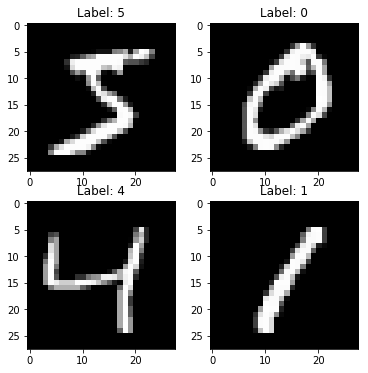

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

In [105]:
y_train[36]

6

In [106]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Benchmark: linear model

Notice that training the linear model on the whole training set will take several minutes. It should give a similar accuracy training on a part of it.

In [112]:
X_train.shape

(50000, 784)

In [113]:
from sklearn.linear_model import LogisticRegression

In [139]:
log_clf_saga = LogisticRegression(solver='saga' ,multi_class='multinomial').fit(X_train,y_train)
np.mean(log_clf_saga.predict(X_val)==y_val)

/Users/danky/anaconda3/envs/ML_Course/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9288

In [126]:
log_clf_saga_part = LogisticRegression(solver='saga' ,multi_class='multinomial').fit(X_train[:10000],y_train[:10000])
np.mean(log_clf_saga_part.predict(X_val)==y_val)

/Users/danky/anaconda3/envs/ML_Course/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9101

### Neural Network with one layer, a.k.a. linear logistic regression.

In [147]:
learning_rate = 0.05
network = []
network.append(Dense(X_train.shape[1],10,learning_rate=learning_rate))
print('Initial accuracy:',np.mean(predict(network,X_val)==y_val))

Initial accuracy: 0.0599


Epoch 29
Train accuracy: 0.92862
Val accuracy: 0.9285


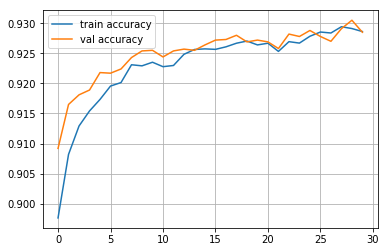

In [141]:
train_log = []
val_log = []
epochs = 30

for epoch in range(epochs):
    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
print('Maximum accuracy on validation set:',max(val_log), 'achieved at epoch:',np.argmax(val_log))

As we can observe, we get a similar accuracy $(\sim 93\%)$ as with the Logistic Regression classifier of sklearn, but this has been faster, since we are using stochatic gradient descent (SGD).

Indeed, the model is exactly the same, a linear logistic regression with a crossentropy loss (maximum likelihood of the multinomial distribution).

As you can see, there is no overfitting applying this model, the accuracies for the training and validation sets are very close to each other.

You can play with the number of `epochs` and the `learning_rate`, and see the influence, especially of the later.

### Neural Network with 3 layers

Without training we expect a random prediction, giving an accuracy of 10%

In [148]:
learning_rate = 0.1

network = []
network.append(Dense(X_train.shape[1],50,learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(50,20,learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(20,10,learning_rate=learning_rate))
print('Initial accuracy:',np.mean(predict(network,X_val)==y_val))

0.1118


Epoch 29
Train accuracy: 0.99796
Val accuracy: 0.9739


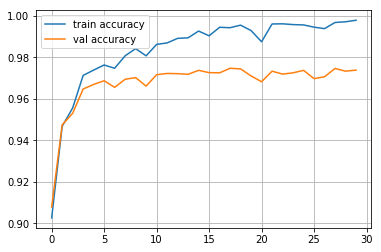

Maximum accuracy on validation set: 0.9748 achieved at epoch: 17


In [149]:
train_log = []
val_log = []
epochs = 30
for epoch in range(epochs):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
print('Maximum accuracy on validation set:',max(val_log), 'achieved at epoch:',np.argmax(val_log))

Now, with a more complex NN, we achieve $97\%$ accuracy. The training pattern is really different in this case, once we have achieved epoch 17, the validation accuracy saturates, but the training one keeps growing. You can see that there is an overfitting problem, but also that the severity of it depends on the number of epochs.

Usually, you would choose the model trained at the epoch in which the validation loss stops decreasing (or, in this case, the validation accuracy stops increasing) as a way of regularizing your model. This is an example of the so called [early stopping](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/).

If we increase the number of parameters, the overfitting should be more noticeable. Although here the accuracy on the training set is close to its maximum $(100\%)$.

In [152]:
learning_rate = 0.1

network = []
network.append(Dense(X_train.shape[1],128,learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(128,64,learning_rate=learning_rate))
network.append(ReLU())
network.append(Dense(64,10,learning_rate=learning_rate))
print('Initial accuracy:',np.mean(predict(network,X_val)==y_val))

Initial accuracy: 0.0688


Epoch 19
Train accuracy: 0.99998
Val accuracy: 0.9808


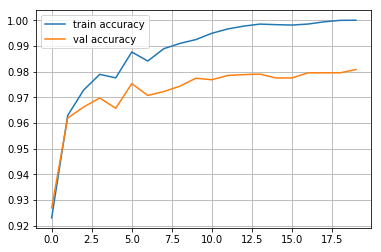

Maximum accuracy on validation set: 0.9808 achieved at epoch: 19


In [153]:
train_log = []
val_log = []
epochs = 20
for epoch in range(epochs):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
print('Maximum accuracy on validation set:',max(val_log), 'achieved at epoch:',np.argmax(val_log))

# Additions (Exercises)

## Other activation functions
Implement activation functions such as:
* Tanh
* LeakyReLU
* Sigmoid
* ArcTan
* Parameteric rectified linear unit (PReLU), [arxiv](https://arxiv.org/pdf/1502.01852.pdf). In which we have a Leaky ReLU with a learnable slope parameter.
* Randomized leaky rectified linear unit (RReLU), [arxiv](https://arxiv.org/pdf/1505.00853.pdf)

You can explore more in [here](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions).



In [156]:
class Sigmoid(Layer):
    def __init__(self):
        """sigmoid layer simply applies elementwise sigmoid to all inputs"""
        pass
    
    def forward(self, input):
        # DO IT YOURSELF
        return output
    def backward(self, input, grad_output):
        # DO IT YOURSELF
        return grad_output*sigmoid_grad      

In [157]:
class LeakyReLU(Layer):
    def __init__(self, slope = 0.01):
        self.slope = slope
        pass
    
    def forward(self, input):
        output = np.maximum(0,input) +self.slope * np.minimum(0,input)
        return output
    
    def backward(self, input, grad_output):
        relu_grad = 1.*(input > 0)+ self.slope*(input < 0)
        return grad_output*relu_grad        

In [158]:
class Tanh(Layer):
    def __init__(self):
        """Tanh layer simply applies elementwise sigmoid to all inputs"""
        pass
    
    def forward(self, input):
        output = 2. / (1. + np.exp(-2.*input))-1.
        return output
    
    def backward(self, input, grad_output):
        sigmoid_2x = 1. / (1. + np.exp(-2.*input))
        tanh_grad = 4. * sigmoid_2x * (1. - sigmoid_2x)
        return grad_output*tanh_grad      

## Initialization

* Implement Dense layer with Xavier initialization as explained [here](http://bit.ly/2vTlmaJ)

Check the influence of the initialization building a deeper network (6 or more layers).

## Regularization techniques

### L1 (Lasso) and L2 (Ridge) regularization.

* Implement a version of Dense layer with L2 regularization penalty: when updating Dense Layer weights, adjust gradients to minimize
$$ \mathcal{L}' = \mathcal{L} + \alpha \cdot \underset i \sum {w_i}^2 \, .$$


* Implement a version of Dense layer with L1 regularization penalty: when updating Dense Layer weights, adjust gradients to minimize:
$$ \mathcal{L}' = \mathcal{L} + \alpha \cdot \underset i \sum |w_i| \, .$$
Even if this loss function is non-differentiable at $w_i = 0$, there is no numerical problem, since it is differentiable up to a zero measure set. This regularization leads to sparse parameters, i.e., it sets many of them to zero, check that!


* At the last exercise, combine both regularizations, with a different parameter for each of them.

Conduct an experiment showing if regularization mitigates overfitting in case of abundantly large number of neurons. Consider tuning $\alpha$ for better results.


### Dropout

Implement Dropout ([guide](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)). 

Note, however, that those "layers" behave differently when training and when predicting on test set.

* Dropout:
  * During training: drop units randomly with probability __p__ and multiply everything by __1/(1-p)__
  * During final predicton: do nothing; pretend there's no dropout
  

## Optimization
Implement a version of Dense layer that uses momentum/rmsprop or whatever method you find in the literature.

Most of those methods require persistent parameters like momentum direction or moving average grad norm, but you can easily store those parameters as attributes inside your layers.

Compare this optimization methods with the basic SGD.

## Batch normalization ( Optimization and regularization)

Implement Batch Normalization ([guide](https://gab41.lab41.org/batch-normalization-what-the-hey-d480039a9e3b)) .

Note, however, that those "layers" behave differently when training and when predicting on test set.
* Batch normalization
  * During training, it substracts mean-over-batch and divides by std-over-batch and updates mean and variance.
  * During final prediction, it uses accumulated mean and variance.
  

# Testing different initializations

### LOADING NMIST

In [23]:
from sklearn.model_selection import train_test_split
loaded = np.load('NMIST_dataset.npz')
X = loaded['X']
X =  X.reshape((-1,X.shape[1]*X.shape[2]))
# IMPORTANT: CHECK WHAT HAPPENS IF WE DON'T SCALE
X = X/255.
y = loaded['Y']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_val,y_val,test_size=0.5)

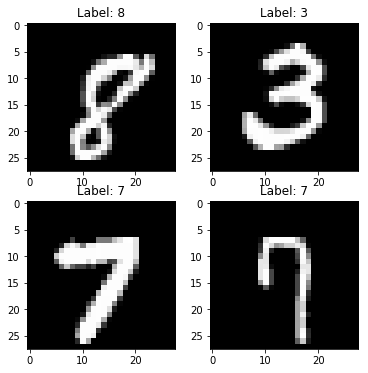

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=[6,6])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

### Initialization test


First, we define a Dense layer with an additional parameter called initializer, which allows us to select the initialization option.

Bearing that in mind, we are going to define 3 identical 6 layer networks, but using differnet initializers:

-network2: The constant variance that was defined by default.

-network3: The "XavierReLU" with variance=2/(input_units)

-network4: The "XavierReLUBoth" with variance=2*2/(input_units+output_units). This is the one originally proposed by Xavier and Bengio, but adding the 2 factor to take into account that we are using ReLU activation functions.

In [172]:
class Dense(Layer):
    """
    Dense layer applying an affine transformation. 
    $$ X_{[l]}= X_{[l-1]} \cdot W_{[l]} + b_{[l]} $$
    """
    def __init__(self, input_units, output_units, learning_rate=0.1,initializer="XavierReLU", trainable = True):

        self.learning_rate = learning_rate
        self.trainable = trainable
        
        # initialize weights with small random numbers. We use normal initialization, 
        # but surely there is something better. Try this once you got it working: http://bit.ly/2vTlmaJ
        if initializer.lower() == "XavierReLUBoth".lower():
            #For ReLU the variance has to be 2*2/(input_units+output_units)
            self.initializer_scale = np.sqrt(4./(input_units+output_units))
        elif initializer.lower() == "XavierReLU".lower():
            #For ReLU the variance has to be 2/input_units
            self.initializer_scale = np.sqrt(2./input_units)
        elif initializer == "XavierSoftmax".lower():
            #For Softmax we have an exponential with tangent at zero equal to 1. variance = 1/input_units
            self.initializer_scale = np.sqrt(1./input_units)
        else:
            self.initializer_scale = 0.01
            
        self.weights = np.random.randn(input_units, output_units)*self.initializer_scale
        self.biases = np.zeros(output_units)
        
        
    def forward(self,input):
        """
        Perform an affine transformation.
        input : np.array of shape=(items, input_units)
        output : np.array of shape=(items, output_units)
        """
        return np.matmul(input,self.weights)+self.biases
    
    def backward(self,input,grad_output):
        """
        Backpropagate the gradient of the features and train the parameters
        using Gradient Descent.
        input : np.array of shape=(items, input_units)
        grad_output : np.array of shape=(items, output_units)
        """
        grad_input = np.matmul(grad_output,self.weights.T)
        if self.trainable:
        # compute gradient w.r.t. weights and biases
            grad_weights = np.matmul(input.T,grad_output)
            grad_biases = np.sum(grad_output,axis=0)
            assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
            # Here we perform a stochastic gradient descent step. 
            # Later on, you can try replacing that with something better.
            self.weights = self.weights - self.learning_rate * grad_weights
            self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

In [137]:
#Deep network using the original initialization  var=(0.01)**2
initi="normal"
network2 = []
network2.append(Dense(X_train.shape[1],600,initializer=initi))
network2.append(ReLU())
network2.append(Dense(600,500,initializer=initi))
network2.append(ReLU())
network2.append(Dense(500,20,initializer=initi))
network2.append(ReLU())
network2.append(Dense(20,16,initializer=initi))
network2.append(ReLU())
network2.append(Dense(16,10,initializer=initi))

In [138]:
#Deep network using "XavierReLU"  var=2/(input_units)
initi="XavierRELU"
network3 = []
network3.append(Dense(X_train.shape[1],600,initializer=initi))
network3.append(ReLU())
network3.append(Dense(600,500,initializer=initi))
network3.append(ReLU())
network3.append(Dense(500,20,initializer=initi))
network3.append(ReLU())
network3.append(Dense(20,16,initializer=initi))
network3.append(ReLU())
network3.append(Dense(16,10,initializer=initi))

In [139]:
#Deep network using "XavierReLUBoth"  var=2*2/(input_units+output_units)
initi="XavierReLUBoth"
network4 = []
network4.append(Dense(X_train.shape[1],600,initializer=initi))
network4.append(ReLU())
network4.append(Dense(600,500,initializer=initi))
network4.append(ReLU())
network4.append(Dense(500,20,initializer=initi))
network4.append(ReLU())
network4.append(Dense(20,16,initializer=initi))
network4.append(ReLU())
network4.append(Dense(16,10,initializer=initi))

Epoch 19
Train accuracy: 0.99584
Val accuracy: 0.9748


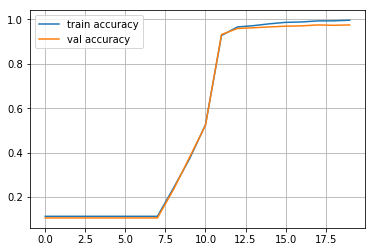

In [140]:
train_log2 = []
val_log2 = []
for epoch in range(20):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network2,x_batch,y_batch)
    
    train_log2.append(np.mean(predict(network2,X_train)==y_train))
    val_log2.append(np.mean(predict(network2,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log2[-1])
    print("Val accuracy:",val_log2[-1])
    plt.plot(train_log2,label='train accuracy')
    plt.plot(val_log2,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
print('Maximum accuracy on validation set:',max(val_log), 'achieved at epoch:',np.argmax(val_log))

Epoch 19
Train accuracy: 1.0
Val accuracy: 0.9837


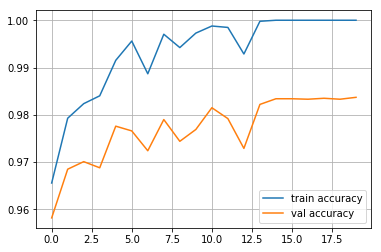

In [141]:
train_log3 = []
val_log3 = []
for epoch in range(20):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network3,x_batch,y_batch)
    
    train_log3.append(np.mean(predict(network3,X_train)==y_train))
    val_log3.append(np.mean(predict(network3,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log3[-1])
    print("Val accuracy:",val_log3[-1])
    plt.plot(train_log3,label='train accuracy')
    plt.plot(val_log3,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
print('Maximum accuracy on validation set:',max(val_log), 'achieved at epoch:',np.argmax(val_log))

Epoch 19
Train accuracy: 1.0
Val accuracy: 0.9828


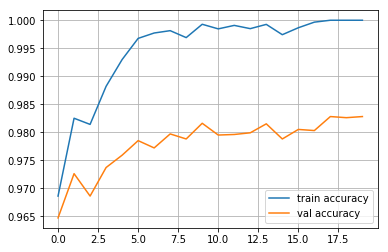

In [142]:
train_log4 = []
val_log4 = []
for epoch in range(20):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network4,x_batch,y_batch)
    
    train_log4.append(np.mean(predict(network4,X_train)==y_train))
    val_log4.append(np.mean(predict(network4,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log4[-1])
    print("Val accuracy:",val_log4[-1])
    plt.plot(train_log4,label='train accuracy')
    plt.plot(val_log4,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
print('Maximum accuracy on validation set:',max(val_log), 'achieved at epoch:',np.argmax(val_log))

### ANALYSIS

We can observe that using the predefined initializer suffers from vanishing gradient problems, since the results are static through all the training process. This is due to the small variance of the weights when being initialized, leading to them being too small and the backpropagation algorithm to be not efficient.

So, in that case network4("XavierReLUBoth") performs slightly better, and both Xavier initializers much better than the constant one. Even having one layer less, it suffers from vanishing gradient problem. 

We can conclude that weight initialization can have a great impact on the learning stage, and that Xavier initialization is a really nice option to consider when deciding how to initialize our parameters.

# ENCODER TEST

In this part, we are gonna build a network with a bottleneck, this is, the last layers will impose that we have to encode each item in a 2 dimensional state, i.e., using only two features. As you will see, the overfitting will be reduced in this setting, because the bottleneck is regularizing.

This forces the network to have a representation of the images in this space, which is linearly separable.

In [159]:
# %matplotlib notebook
from ipywidgets import interact
from sklearn.decomposition import PCA
import pickle

First, let us show how the different classes are distributed in the original feature space (using PCA to plot it in a 2D figure).

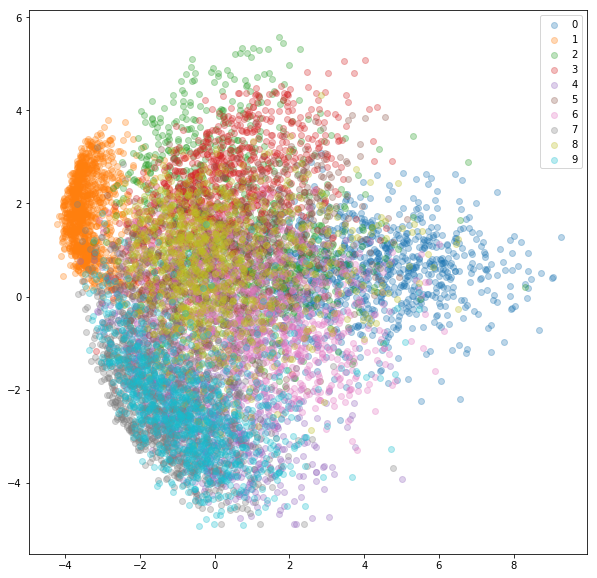

In [175]:
pca = PCA(n_components = 2)
X_test_PCA = pca.fit_transform(X_test)
fig = plt.figure(figsize=(10,10))
for i in range(10):
    plt.scatter(X_test_PCA[y_test==i,0],X_test_PCA[y_test==i,1],label = str(i),alpha=0.3)
plt.legend()

In [160]:
network4 = pickle.load(open('network4.pickle', "rb"))

Epoch 19
Train accuracy: 0.989938775510204
Val accuracy: 0.9729523809523809


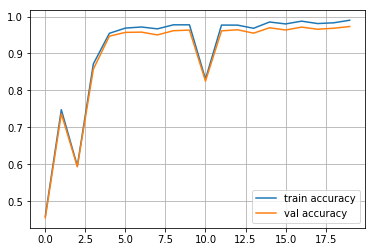

In [83]:
# #Deep network using "XavierReLUBoth"  var=2*2/(input_units+output_units)
# initi="XavierReLUBoth"
# network4 = []
# network4.append(Dense(X_train.shape[1],512,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(512,256,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(256,32,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(32,2,initializer=initi))
# network4.append(ReLU())
# network4.append(Dense(2,2,initializer=initi))
# network4.append(Tanh())
# network4.append(Dense(2,10,initializer=initi))


# train_log4 = []
# val_log4 = []
# for epoch in range(20):

#     for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
#         train(network4,x_batch,y_batch)
    
#     train_log4.append(np.mean(predict(network4,X_train)==y_train))
#     val_log4.append(np.mean(predict(network4,X_val)==y_val))
    
#     clear_output()
#     print("Epoch",epoch)
#     print("Train accuracy:",train_log4[-1])
#     print("Val accuracy:",val_log4[-1])
#     plt.plot(train_log4,label='train accuracy')
#     plt.plot(val_log4,label='val accuracy')
#     plt.legend(loc='best')
#     plt.grid()
#     plt.show()
# print('Maximum accuracy on validation set:',max(val_log4), 'achieved at epoch:',np.argmax(val_log4))

In [ ]:
# import pickle
# with open('network4.pickle', "wb") as output_file:
#     pickle.dump(network4, output_file,pickle.HIGHEST_PROTOCOL)

In [161]:
(predict(network4,X_val)==y_val).mean()

0.9846

In [167]:
enc_list = [X_test_PCA]
for i in reversed(range(1,5)):
    enc_list.append(forward(network4,X_test)[-i])

@interact
def show_articles_more_than(step=(0, len(enc_list)-1, 1)):
    enc = enc_list[step]
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.scatter(enc[y_test==i,0],enc[y_test==i,1],label = str(i),alpha=0.3)
    plt.legend()
    return None
return None

interactive(children=(IntSlider(value=2, description='step', max=4), Output()), _dom_classes=('widget-interact…

In [168]:
network5 = pickle.load(open('network5.pickle', "rb"))

Epoch 19
Train accuracy: 0.8465714285714285
Val accuracy: 0.8362857142857143


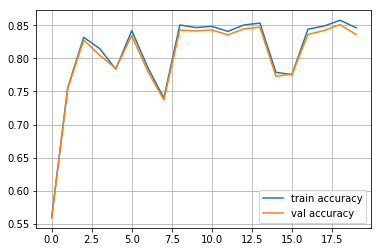

In [96]:
# #Deep network using "XavierReLUBoth"  var=2*2/(input_units+output_units)
# initi="XavierReLUBoth"
# network5 = []
# network5.append(Dense(X_train.shape[1],512,initializer=initi))
# network5.append(Tanh())
# network5.append(Dense(512,256,initializer=initi))
# network5.append(Tanh())
# network5.append(Dense(256,32,initializer=initi))
# network5.append(Tanh())
# network5.append(Dense(32,2,initializer=initi))
# network5.append(Tanh())
# network5.append(Dense(2,2,initializer=initi))
# network5.append(Tanh())
# network5.append(Dense(2,10,initializer=initi))


# train_log5 = []
# val_log5 = []
# for epoch in range(20):

#     for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
#         train(network5,x_batch,y_batch)
    
#     train_log5.append(np.mean(predict(network5,X_train)==y_train))
#     val_log5.append(np.mean(predict(network5,X_val)==y_val))
    
#     clear_output()
#     print("Epoch",epoch)
#     print("Train accuracy:",train_log5[-1])
#     print("Val accuracy:",val_log5[-1])
#     plt.plot(train_log5,label='train accuracy')
#     plt.plot(val_log5,label='val accuracy')
#     plt.legend(loc='best')
#     plt.grid()
#     plt.show()
# print('Maximum accuracy on validation set:',max(train_log5), 'achieved at epoch:',np.argmax(train_log5))

In [97]:
# import pickle
# with open('network5.pickle', "wb") as output_file:
#     pickle.dump(network5, output_file,pickle.HIGHEST_PROTOCOL)

In [169]:
enc_list = [X_test_PCA]
for i in reversed(range(1,5)):
    enc_list.append(forward(network5,X_test)[-i])

@interact
def show_articles_more_than(step=(0, len(enc_list)-1, 1)):
    enc = enc_list[step]
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.scatter(enc[y_test==i,0],enc[y_test==i,1],label = str(i),alpha=0.3)
    plt.legend()
    return None
return None

interactive(children=(IntSlider(value=2, description='step', max=4), Output()), _dom_classes=('widget-interact…

In [179]:
network6 = pickle.load(open('network6.pickle', "rb"))

Epoch 19
Train accuracy: 0.98486
Val accuracy: 0.9603


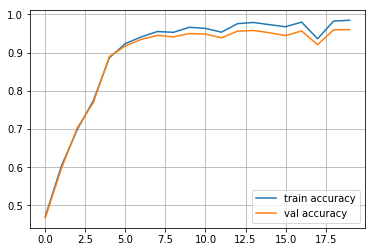

Maximum accuracy on validation set: 0.9808 achieved at epoch: 19


In [174]:
# initi="XavierReLUBoth"
# learning_rate = 0.02
# network6 = []
# network6.append(Dense(X_train.shape[1],512,initializer=initi,learning_rate=learning_rate))
# network6.append(LeakyReLU())
# network6.append(Dense(512,256,initializer=initi,learning_rate=learning_rate))
# network6.append(LeakyReLU())
# network6.append(Dense(256,32,initializer=initi,learning_rate=learning_rate))
# network6.append(LeakyReLU())
# network6.append(Dense(32,2,initializer=initi,learning_rate=learning_rate))
# network6.append(LeakyReLU())
# network6.append(Dense(2,2,initializer=initi,learning_rate=learning_rate))
# network6.append(LeakyReLU())
# network6.append(Dense(2,10,initializer=initi,learning_rate=learning_rate))


# train_log5 = []
# val_log5 = []
# for epoch in range(20):

#     for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
#         train(network6,x_batch,y_batch)
    
#     train_log5.append(np.mean(predict(network6,X_train)==y_train))
#     val_log5.append(np.mean(predict(network6,X_val)==y_val))
    
#     clear_output()
#     print("Epoch",epoch)
#     print("Train accuracy:",train_log5[-1])
#     print("Val accuracy:",val_log5[-1])
#     plt.plot(train_log5,label='train accuracy')
#     plt.plot(val_log5,label='val accuracy')
#     plt.legend(loc='best')
#     plt.grid()
#     plt.show()
# print('Maximum accuracy on validation set:',max(val_log5), 'achieved at epoch:',np.argmax(val_log5))

In [178]:
# import pickle
# with open('network6.pickle', "wb") as output_file:
#     pickle.dump(network6, output_file,pickle.HIGHEST_PROTOCOL)

In [180]:
enc_list = [X_test_PCA]
for i in reversed(range(1,5)):
    enc_list.append(forward(network6,X_test)[-i])

@interact
def show_articles_more_than(step=(0, len(enc_list)-1, 1)):
    enc = enc_list[step]
    fig = plt.figure(figsize=(10,10))
    for i in range(10):
        plt.scatter(enc[y_test==i,0],enc[y_test==i,1],label = str(i),alpha=0.3)
    plt.legend()
    return None
return None

interactive(children=(IntSlider(value=2, description='step', max=4), Output()), _dom_classes=('widget-interact…

## Exercise: The old binary classification problem

Apply the methods shown above to solve the classification problem of the previous lecture. How the metrics compare with the methods we used before?

Try to use a NN in which all the layers have 2 neurons, i.e., we are always dealing with a 2-dimensional feature space. Check how the NN is transforming the points after applying each layer.

You can also play with larger layers (more neurons) and compare the metrics. If you want a way of plotting the features of that layers, you can use a PCA projection.

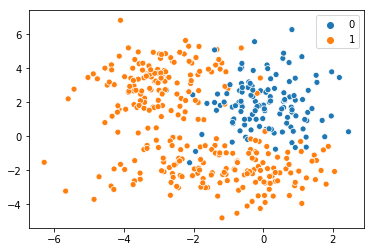

In [221]:
dic_data_A = {'n': 200 ,'mean': (0,2), 'cov' :((1,0),(0,2)), 'y' : 0 }  # RED
dic_data_B = {'n': 250 ,'mean': (-1,-2), 'cov' :((3,0),(0,1)), 'y' : 1 }  # BLUE
dic_data_B2 = {'n': 250 ,'mean': (-3,3), 'cov' :((1,0),(0,2)), 'y' : 1 }  # BLUE
# dic_data = {'A': dic_data_A, 'B' : dic_data_B }
dic_data = {'A': dic_data_A, 'B' : dic_data_B , 'B2' : dic_data_B2 }

# We sample the points with numpy.random
np.random.seed(1)
samples = {key : np.random.multivariate_normal(dic['mean'], np.array(dic['cov']), dic['n']) 
           for key,dic in dic_data.items()}
     
X = np.concatenate(tuple(samples[key] for key in dic_data.keys() ),axis=0)
Y = np.concatenate(tuple(dic['y']* np.ones(dic['n'], dtype='int') 
                         for key,dic in dic_data.items() ), axis=0)

# Train Val Test Split. 60% / 20% / 20%.
X_train,X_val,y_train, y_val = train_test_split(X,Y,test_size = 0.4)
X_val,X_test,y_val, y_test = train_test_split(X_val,y_val,test_size = 0.5)

# We transform into coordinates in the plane to make plotting easier.
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 150*np.eye(3)[[0,2,1]][np.array(y_train,dtype='int')]
]
colors_val = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 150*np.eye(3)[[0,2,1]][np.array(y_val,dtype='int')]
]
colors_test = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g ,b  in 150*np.eye(3)[[0,2,1]][np.array(y_test,dtype='int')]
]
x0_range = (X[:,0].min()-1,X[:,0].max()+1)
x1_range = (X[:,1].min()-1,X[:,1].max()+1)
x0 = X_train[:,0] 
x1 = X_train[:,1] 
x0_val = X_val[:,0] 
x1_val = X_val[:,1] 
x0_test = X_test[:,0] 
x1_test = X_test[:,1] 

import seaborn as sns
sns.scatterplot(x0,x1,hue=y_train)

Epoch 49
Train accuracy: 0.9428571428571428
Val accuracy: 0.9357142857142857


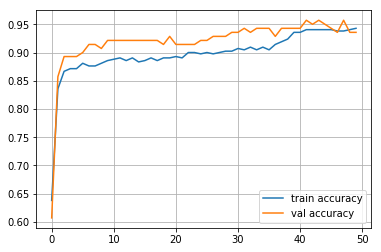

Maximum accuracy on validation set: 0.9571428571428572 achieved at epoch: 41


In [224]:
initi="XavierReLUBoth"
learning_rate = 0.01
network = []
network.append(Dense(X_train.shape[1],16,initializer=initi,learning_rate=learning_rate))
network.append(LeakyReLU())
network.append(Dense(16,8,initializer=initi,learning_rate=learning_rate))
network.append(LeakyReLU())
network.append(Dense(8,4,initializer=initi,learning_rate=learning_rate))
network.append(LeakyReLU())
network.append(Dense(4,2,initializer=initi,learning_rate=learning_rate))
network.append(LeakyReLU())
network.append(Dense(2,2,initializer=initi,learning_rate=learning_rate))
network.append(LeakyReLU())
network.append(Dense(2,2,initializer=initi,learning_rate=learning_rate))


train_log = []
val_log = []
epochs = 50
for epoch in range(epochs):

    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        train(network,x_batch,y_batch)
    
    train_log.append(np.mean(predict(network,X_train)==y_train))
    val_log.append(np.mean(predict(network,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
print('Maximum accuracy on validation set:',max(val_log), 'achieved at epoch:',np.argmax(val_log))

In [225]:
# pca = PCA(n_components = 2)
# X_val_PCA = pca.fit_transform(X_val)
enc_list = [X_val]
for i in reversed(range(1,5)):
    enc_list.append(forward(network,X_val)[-i])

@interact
def show_articles_more_than(step=(0, len(enc_list)-1, 1)):
    enc = enc_list[step]
    fig = plt.figure(figsize=(10,10))
    for i in np.unique(y_val):
        plt.scatter(enc[y_val==i,0],enc[y_val==i,1],label = str(i),alpha=0.3)
    plt.legend()
    return None
return None

interactive(children=(IntSlider(value=2, description='step', max=4), Output()), _dom_classes=('widget-interact…